In [396]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import feature_engineering_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [397]:
df = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0

# Replace steps < 500 with user's median

In [398]:
df = df.astype({"id": str})
ids = list(np.unique((df[['id']])))
len(ids)

71

In [399]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df.loc[user_df['steps'] < 500, 'steps'] = user_df['steps'].median()
    d = pd.concat([d, user_df])
    
d = d.reset_index()

In [400]:
#create_report(d).show_browser()

In [401]:
df = d.drop(columns='index')
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [402]:
#create_report(df).show_browser()

# Adds stress_quantile

In [403]:
df["stress_quantile"] = pd.qcut(df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=["low", "medium", "high"])

In [404]:
df['stress_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)

<AxesSubplot:xlabel='count', ylabel='stress_quantile'>

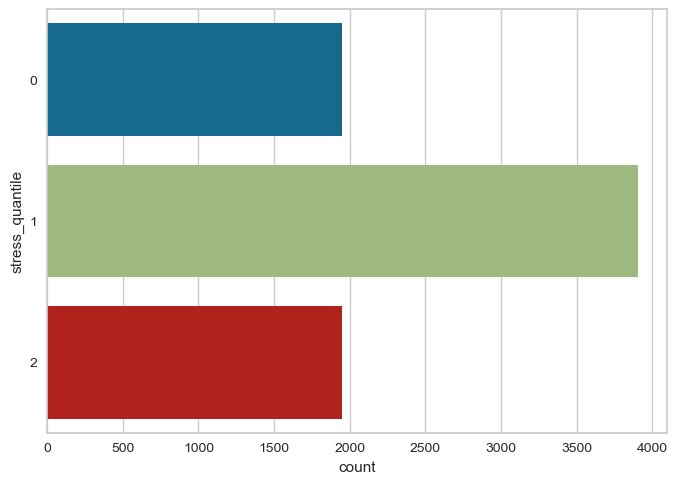

In [405]:
sns.countplot(y="stress_quantile", data=df)

In [406]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df["user_stress_quantile"] = pd.qcut(user_df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=[0, 1, 2])
    d = pd.concat([d, user_df])
    
df=d
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0

<AxesSubplot:xlabel='count', ylabel='user_stress_quantile'>

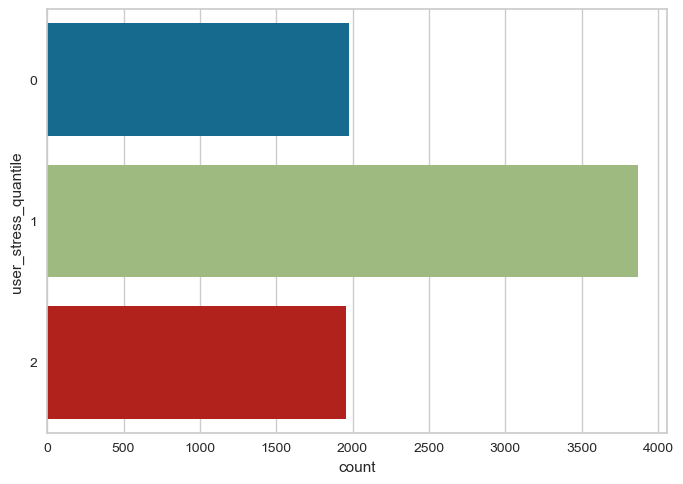

In [407]:
sns.countplot(y="user_stress_quantile", data=df)

In [408]:
#create_report(df).show_browser() # stress_quantile and user_stress quantile are NOT identical, keep them both

# Adds sleep duration average values for each user

In [409]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_sleep_duration'] = user_df['sleep_duration'].mean()
    d = pd.concat([d, user_df])

In [410]:
df=d

# Adds steps average values for each user

In [411]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_steps'] = user_df['steps'].mean()
    d = pd.concat([d, user_df])

In [412]:
df=d
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,2,1,3.255517e+07,8892.885057
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0

# date engineering for start and end sleep time

In [413]:
def sin_transform(values):
    return np.sin(2 * np.pi * values / len(set(values)))


def cos_transform(values):
    return np.cos(2 * np.pi * values / len(set(values)))

In [414]:
cols = ['startTime', 'endTime']

for col in cols:
    df[col] =  pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S.%f')

In [415]:
df.loc[:, 'startHour'] = df.startTime.dt.hour
df.loc[:, 'endHour'] = df.endTime.dt.hour

In [416]:
cols = ['startHour', 'endHour']

for col in cols:
    # Sin transformation in time features
    df["%s_sin"%col] = sin_transform(df[col])
    # Cos transformation in time features
    df["%s_cos"%col] = cos_transform(df[col])

In [417]:
df.to_pickle("../data/unified_dataframe/data_preprocessed.pkl")

# encode steps 24h